# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [2]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


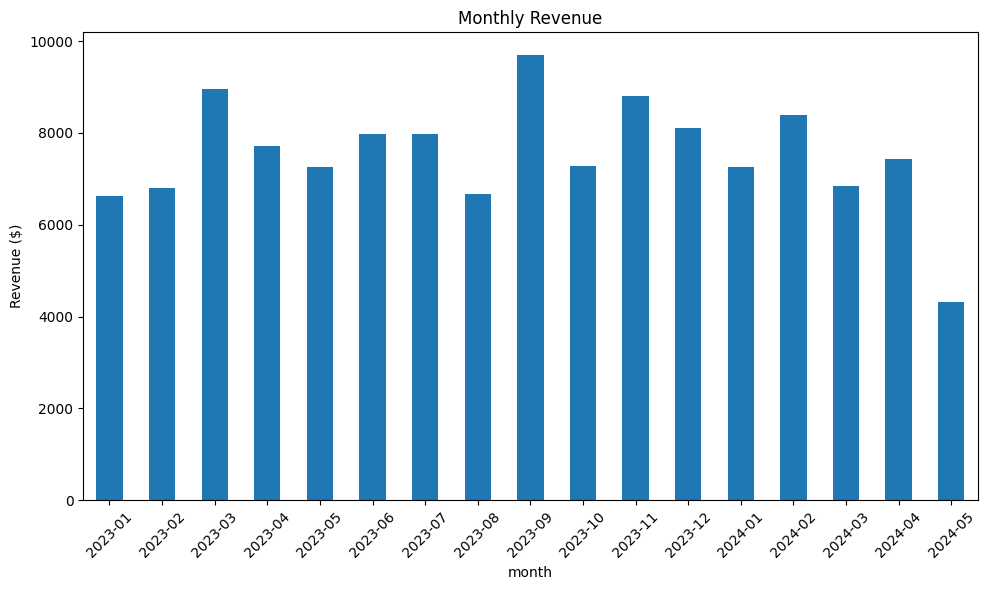

In [3]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

Total Revenue for Q1 2024: $22,493.23

Monthly Breakdown:
------------------------------
2024-01: $7,268.59
2024-02: $8,388.91
2024-03: $6,835.73

Monthly Revenue Summary:
Average monthly revenue: $7,497.74
Highest month: 2024-02 ($8,388.91)
Lowest month: 2024-03 ($6,835.73)


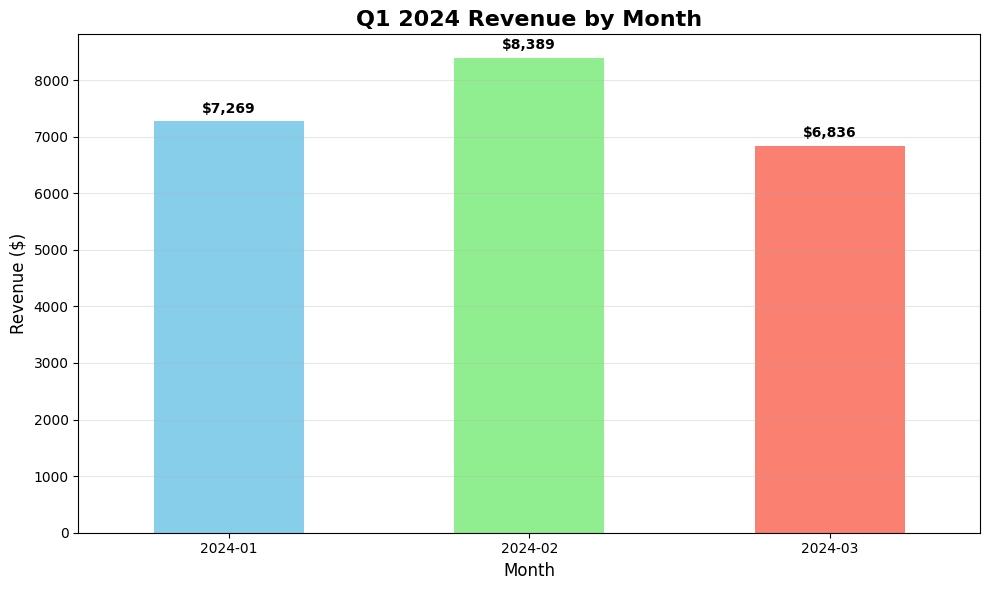

In [5]:
# Your code here
last_quarter_data = data[
    (data["order_date"] >= "2024-01-01") & 
    (data["order_date"] <= "2024-03-31")
]

total_revenue = last_quarter_data["revenue"].sum()
print(f"Total Revenue for Q1 2024: ${total_revenue:,.2f}")
print()

monthly_breakdown = last_quarter_data.groupby("month")["revenue"].sum()
print("Monthly Breakdown:")
print("-" * 30)
for month, revenue in monthly_breakdown.items():
    print(f"{month}: ${revenue:,.2f}")

print()
print("Monthly Revenue Summary:")
print(f"Average monthly revenue: ${monthly_breakdown.mean():,.2f}")
print(f"Highest month: {monthly_breakdown.idxmax()} (${monthly_breakdown.max():,.2f})")
print(f"Lowest month: {monthly_breakdown.idxmin()} (${monthly_breakdown.min():,.2f})")

plt.figure(figsize=(10, 6))
monthly_breakdown.plot(kind="bar", color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Q1 2024 Revenue by Month", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)
plt.xticks(rotation=0)

for i, v in enumerate(monthly_breakdown.values):
    plt.text(i, v + 100, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

Top 5 Customers by Total Revenue:
----------------------------------------
Customer #62.0: $4,448.39
Customer #24.0: $3,369.44
Customer #90.0: $2,976.78
Customer #92.0: $2,838.74
Customer #97.0: $2,835.62


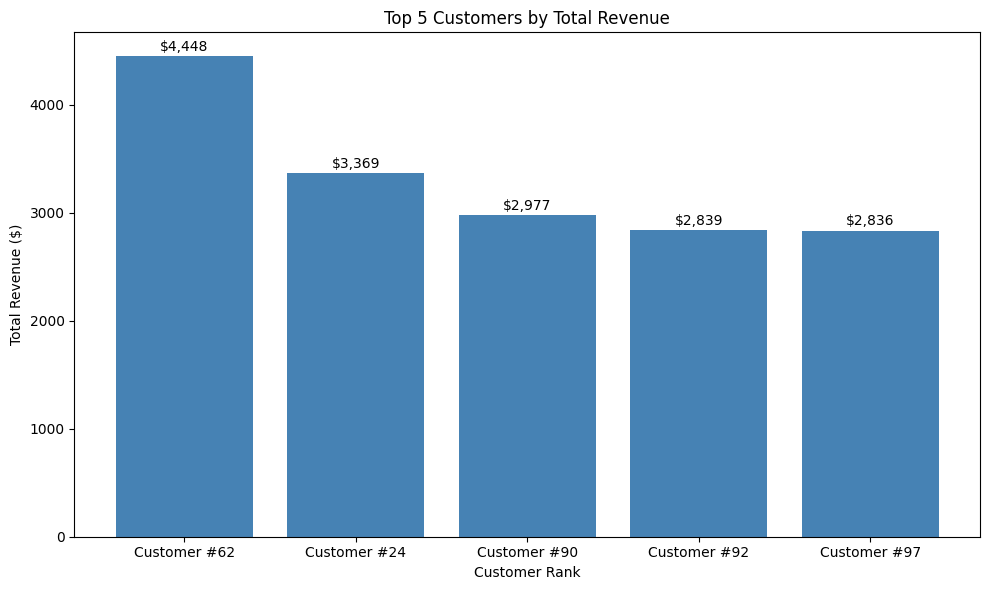

In [ ]:
# Your code here
customer_revenue = data.groupby('customer_id')['revenue'].sum().reset_index()
customer_revenue = customer_revenue.sort_values('revenue', ascending=False)

top_5_customers = customer_revenue.head(5)

print("Top 5 Customers by Total Revenue:")
print("-" * 40)
for i, row in top_5_customers.iterrows():
    print(f"Customer #{row['customer_id']}: ${row['revenue']:,.2f}")

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_5_customers)), top_5_customers['revenue'], color='steelblue')
plt.title('Top 5 Customers by Total Revenue')
plt.xlabel('Customer Rank')
plt.ylabel('Total Revenue ($)')
plt.xticks(range(len(top_5_customers)), [f"Customer #{int(cid)}" for cid in top_5_customers['customer_id']])

for i, v in enumerate(top_5_customers['revenue']):
    plt.text(i, v + 20, f'${v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

In [12]:
# Your code here
avg_order_by_segment = data.groupby('customer_segment')['revenue'].mean().reset_index()
avg_order_by_segment = avg_order_by_segment.sort_values('revenue', ascending=False)

print("Average Order Value by Customer Segment:")
print("-" * 45)
for i, row in avg_order_by_segment.iterrows():
    print(f"{row['customer_segment']}: ${row['revenue']:.2f}")


Average Order Value by Customer Segment:
---------------------------------------------
Senior: $262.13
Professional: $255.65
Student: $253.81


### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

TOTAL REVENUE BY REGION:
------------------------------
South: $34,839.45
North: $34,351.69
East: $31,221.80
West: $27,727.73

AVERAGE ORDER SIZE BY REGION:
-----------------------------------
South: $274.33
North: $258.28
West: $252.07
East: $240.17


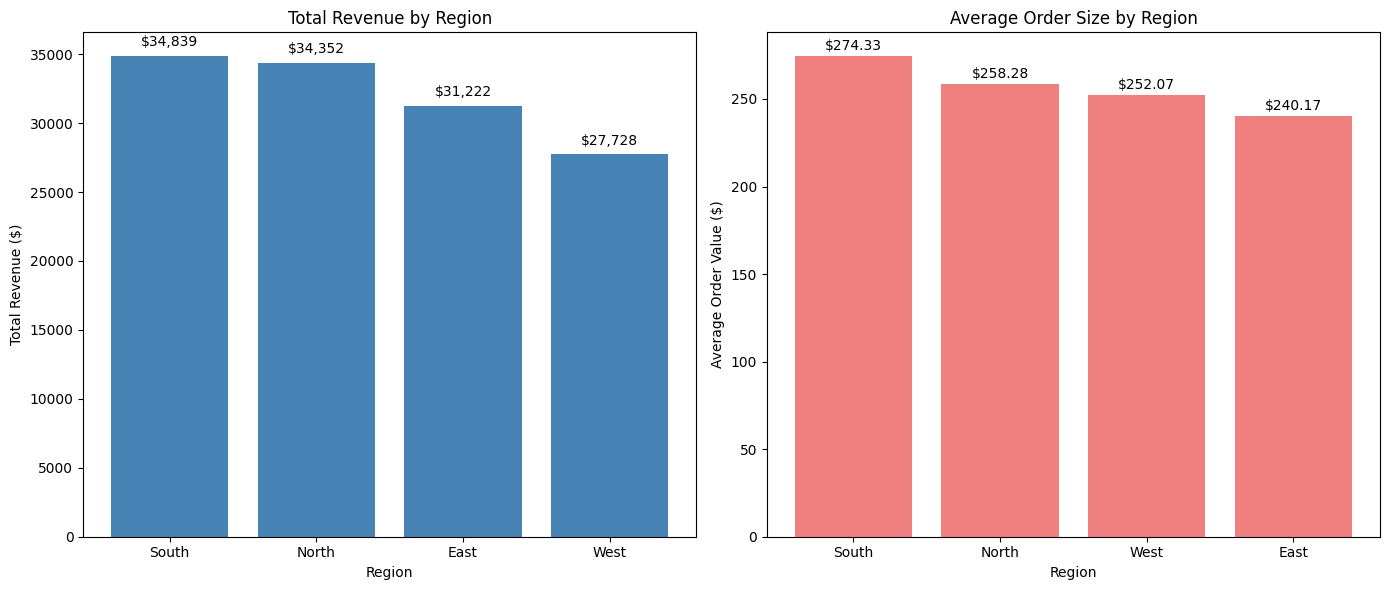

In [14]:
total_revenue_by_region = data.groupby('region')['revenue'].sum().reset_index()
total_revenue_by_region = total_revenue_by_region.sort_values('revenue', ascending=False)

avg_order_by_region = data.groupby('region')['revenue'].mean().reset_index()
avg_order_by_region = avg_order_by_region.sort_values('revenue', ascending=False)

print("TOTAL REVENUE BY REGION:")
print("-" * 30)
for i, row in total_revenue_by_region.iterrows():
    print(f"{row['region']}: ${row['revenue']:,.2f}")

print("\nAVERAGE ORDER SIZE BY REGION:")
print("-" * 35)
for i, row in avg_order_by_region.iterrows():
    print(f"{row['region']}: ${row['revenue']:.2f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.bar(total_revenue_by_region['region'], total_revenue_by_region['revenue'], color='steelblue')
ax1.set_title('Total Revenue by Region')
ax1.set_xlabel('Region')
ax1.set_ylabel('Total Revenue ($)')
for i, v in enumerate(total_revenue_by_region['revenue']):
    ax1.text(i, v + 500, f'${v:,.0f}', ha='center', va='bottom')

ax2.bar(avg_order_by_region['region'], avg_order_by_region['revenue'], color='lightcoral')
ax2.set_title('Average Order Size by Region')
ax2.set_xlabel('Region')
ax2.set_ylabel('Average Order Value ($)')
for i, v in enumerate(avg_order_by_region['revenue']):
    ax2.text(i, v + 2, f'${v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

MOST POPULAR BY QUANTITY (Units Sold):
----------------------------------------
Home: 269 units
Clothing: 253 units
Sports: 246 units
Electronics: 239 units
Books: 227 units

MOST POPULAR BY REVENUE (Total Sales):
----------------------------------------
Home: $29,871.47
Electronics: $25,498.31
Clothing: $24,804.57
Books: $24,046.06
Sports: $23,920.26


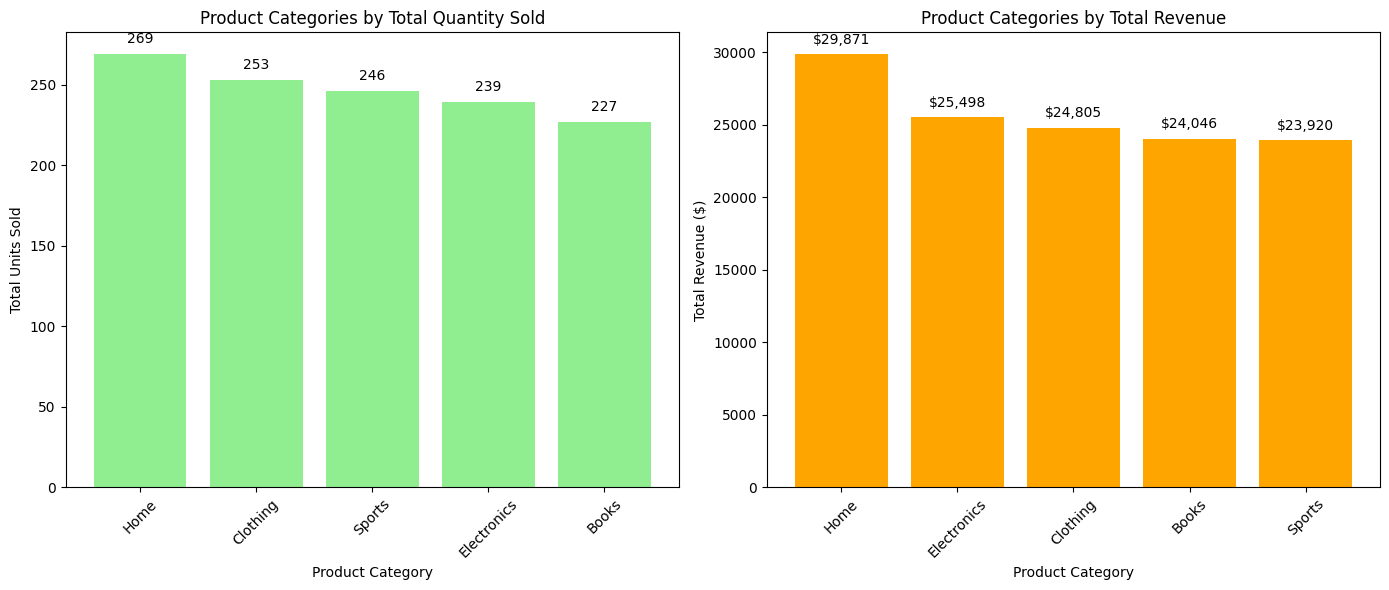

In [ ]:
# Your code here
quantity_by_category = data.groupby('product_category')['quantity'].sum().reset_index()
quantity_by_category = quantity_by_category.sort_values('quantity', ascending=False)

revenue_by_category = data.groupby('product_category')['revenue'].sum().reset_index()
revenue_by_category = revenue_by_category.sort_values('revenue', ascending=False)

print("MOST POPULAR BY QUANTITY (Units Sold):")
print("-" * 40)
for i, row in quantity_by_category.iterrows():
    print(f"{row['product_category']}: {row['quantity']} units")

print("\nMOST POPULAR BY REVENUE (Total Sales):")
print("-" * 40)
for i, row in revenue_by_category.iterrows():
    print(f"{row['product_category']}: ${row['revenue']:,.2f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.bar(quantity_by_category['product_category'], quantity_by_category['quantity'], color='lightgreen')
ax1.set_title('Product Categories by Total Quantity Sold')
ax1.set_xlabel('Product Category')
ax1.set_ylabel('Total Units Sold')
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(quantity_by_category['quantity']):
    ax1.text(i, v + 5, f'{v}', ha='center', va='bottom')

ax2.bar(revenue_by_category['product_category'], revenue_by_category['revenue'], color='orange')
ax2.set_title('Product Categories by Total Revenue')
ax2.set_xlabel('Product Category')
ax2.set_ylabel('Total Revenue ($)')
ax2.tick_params(axis='x', rotation=45)
for i, v in enumerate(revenue_by_category['revenue']):
    ax2.text(i, v + 500, f'${v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

In [ ]:
# Your code here
data['has_discount'] = data['discount_applied'] > 0

discount_comparison = data.groupby('has_discount')['revenue'].mean().reset_index()

print("AVERAGE REVENUE PER ORDER:")
print("-" * 30)
for i, row in discount_comparison.iterrows():
    discount_status = "With Discount" if row['has_discount'] else "No Discount"
    print(f"{discount_status}: ${row['revenue']:.2f}")

no_discount_avg = discount_comparison[discount_comparison['has_discount'] == False]['revenue'].values[0]
with_discount_avg = discount_comparison[discount_comparison['has_discount'] == True]['revenue'].values[0]
difference = with_discount_avg - no_discount_avg

print(f"\nDifference: ${difference:.2f}")


AVERAGE REVENUE PER ORDER:
------------------------------
No Discount: $248.30
With Discount: $263.83

Difference: $15.54


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

In [20]:
# Your code here
payment_counts = data['payment_method'].value_counts()
payment_percentages = (payment_counts / len(data) * 100).round(1)

avg_spending_by_payment = data.groupby('payment_method')['revenue'].mean().reset_index()
avg_spending_by_payment = avg_spending_by_payment.sort_values('revenue', ascending=False)

print("PAYMENT METHOD USAGE (% of orders):")
print("-" * 40)
for method, percentage in payment_percentages.items():
    print(f"{method}: {percentage}%")

print("\nAVERAGE SPENDING BY PAYMENT METHOD:")
print("-" * 40)
for i, row in avg_spending_by_payment.iterrows():
    print(f"{row['payment_method']}: ${row['revenue']:.2f}")


PAYMENT METHOD USAGE (% of orders):
----------------------------------------
Credit Card: 27.4%
Gift Card: 24.8%
Debit Card: 24.6%
PayPal: 23.2%

AVERAGE SPENDING BY PAYMENT METHOD:
----------------------------------------
Debit Card: $275.98
Credit Card: $257.44
Gift Card: $254.36
PayPal: $236.07


### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

REVENUE BY DAY OF WEEK:
------------------------------
Monday: $17,704.70
Tuesday: $18,968.41
Wednesday: $18,908.21
Thursday: $17,846.36
Friday: $18,522.40
Saturday: $18,660.35
Sunday: $17,530.24

WEEKDAY vs WEEKEND COMPARISON:
Weekdays (Mon-Fri): $91,950.08
Weekends (Sat-Sun): $36,190.59


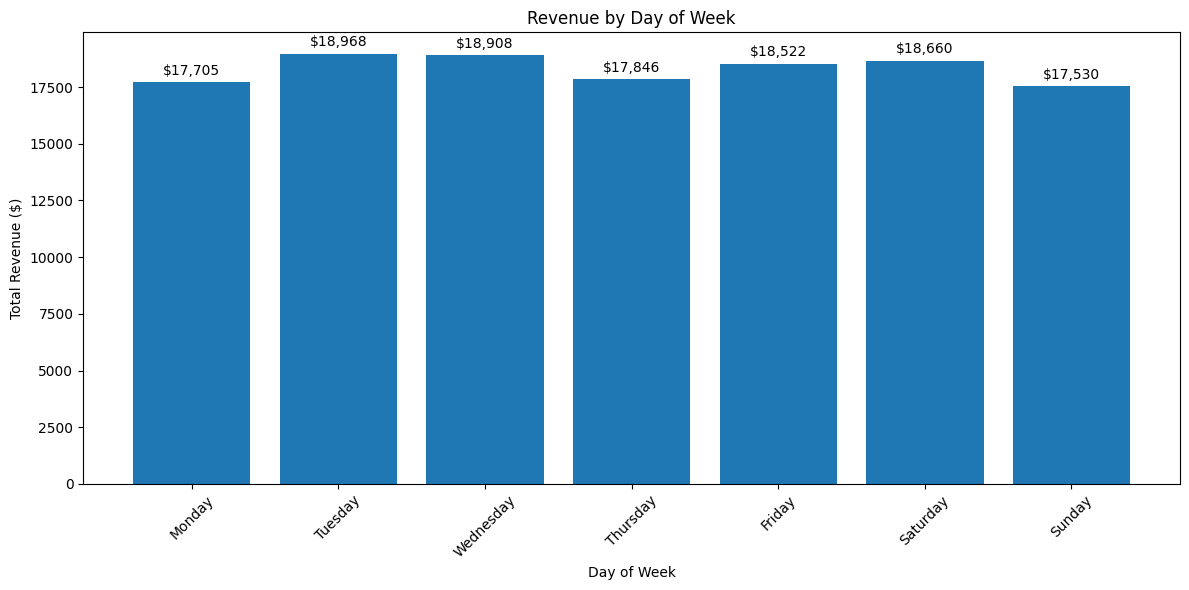

In [25]:
# Your code here
data["order_date"] = pd.to_datetime(data["order_date"])
data["day_of_week"] = data["order_date"].dt.day_name()

revenue_by_day = data.groupby("day_of_week")["revenue"].sum().reset_index()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
revenue_by_day['day_of_week'] = pd.Categorical(revenue_by_day['day_of_week'], categories=day_order, ordered=True)
revenue_by_day = revenue_by_day.sort_values('day_of_week')

print("REVENUE BY DAY OF WEEK:")
print("-" * 30)
for i, row in revenue_by_day.iterrows():
    print(f"{row['day_of_week']}: ${row['revenue']:,.2f}")

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

weekday_revenue = revenue_by_day[revenue_by_day['day_of_week'].isin(weekdays)]['revenue'].sum()
weekend_revenue = revenue_by_day[revenue_by_day['day_of_week'].isin(weekends)]['revenue'].sum()

print(f"\nWEEKDAY vs WEEKEND COMPARISON:")
print(f"Weekdays (Mon-Fri): ${weekday_revenue:,.2f}")
print(f"Weekends (Sat-Sun): ${weekend_revenue:,.2f}")

plt.figure(figsize=(12, 6))
plt.bar(revenue_by_day['day_of_week'], revenue_by_day['revenue'])
plt.title('Revenue by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)

for i, v in enumerate(revenue_by_day['revenue']):
    plt.text(i, v + 200, f'${v:,.0f}', ha='center', va='bottom')


plt.tight_layout()
plt.show()

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

PROFITABILITY ANALYSIS:
-------------------------
Total Revenue: $128,140.67
Total Profit (20% margin): $25,628.13
Profit Margin: 20%

PROFIT BY REGION:
--------------------
South: $6,967.89
North: $6,870.34
East: $6,244.36
West: $5,545.55

Most profitable region: South


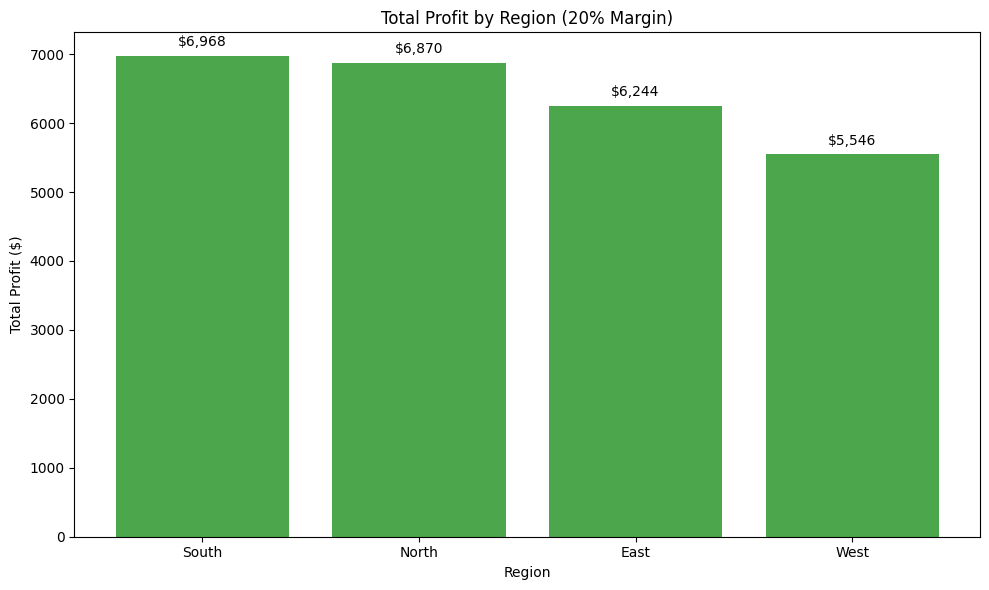

In [28]:
# Your code here
data['profit'] = data['revenue'] * 0.20

total_profit = data['profit'].sum()
total_revenue = data['revenue'].sum()

print("PROFITABILITY ANALYSIS:")
print("-" * 25)
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Profit (20% margin): ${total_profit:,.2f}")
print(f"Profit Margin: 20%")

profit_by_region = data.groupby('region')['profit'].sum().reset_index()
profit_by_region = profit_by_region.sort_values('profit', ascending=False)

print(f"\nPROFIT BY REGION:")
print("-" * 20)
for i, row in profit_by_region.iterrows():
    print(f"{row['region']}: ${row['profit']:,.2f}")

print(f"\nMost profitable region: {profit_by_region.iloc[0]['region']}")

plt.figure(figsize=(10, 6))
plt.bar(profit_by_region['region'], profit_by_region['profit'], color='green', alpha=0.7)
plt.title('Total Profit by Region (20% Margin)')
plt.xlabel('Region')
plt.ylabel('Total Profit ($)')

for i, v in enumerate(profit_by_region['profit']):
    plt.text(i, v + 100, f'${v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Your recommendation here:**
I would promote the Southern and Northern region because they are the biggest spenders on products and make up the largest part of our revenue

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.